In [22]:
#Phase 1 Dataset
!pip install opencv-python
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import numpy as np
from glob import glob
from skimage import exposure, restoration

In [23]:
# Define dataset path
dataset_path = "/content/drive/MyDrive/University /Spring 2025/Data Mining and Machine Learning /Project/GAN-Traning Images"

In [24]:
# Check if path exists
if os.path.exists(dataset_path):
    print("✅ Dataset path exists.")
    print("Contents of dataset folder:", os.listdir(dataset_path))
else:
    print("❌ Dataset path does not exist. Check the path.")

✅ Dataset path exists.
Contents of dataset folder: ['Te-me_0064.jpg', 'Te-gl_0045.jpg', 'Te-me_0105.jpg', 'Te-gl_0044.jpg', 'Te-me_0066.jpg', 'Te-gl_0284.jpg', 'Te-meTr_0007.jpg', 'OAS2_0183_MR2_y_slice_133.jpg', 'Te-gl_0118.jpg', 'Te-gl_0053.jpg', 'Te-gl_0078.jpg', 'OAS2_0185_MR1_z_slice_148.jpg', 'Te-gl_0087.jpg', 'Te-me_0113.jpg', 'Te-meTr_0004.jpg', 'Te-me_0107.jpg', 'Te-gl_0047.jpg', 'Te-gl_0269.jpg', 'Te-gl_0251.jpg', 'Te-me_0099.jpg', 'Te-gl_0052.jpg', 'Te-me_0071.jpg', 'Te-gl_0285.jpg', 'OAS2_0183_MR3_x_slice_149.jpg', 'Te-gl_0293.jpg', 'Te-me_0111.jpg', 'Te-me_0104.jpg', 'Te-gl_0084.jpg', 'OAS2_0185_MR2_z_slice_124.jpg', 'Te-gl_0051.jpg', 'OAS2_0183_MR4_y_slice_145.jpg', 'Te-me_0070.jpg', 'Te-gl_0133.jpg', 'Te-gl_0279.jpg', 'Te-gl_0292.jpg', 'Te-me_0106.jpg', 'Te-gl_0127.jpg', 'OAS2_0186_MR2_x_slice_107.jpg', 'Te-me_0072.jpg', 'Te-gl_0287.jpg', 'Te-meTr_0006.jpg', 'Te-gl_0086.jpg', 'Te-gl_0119.jpg', 'Te-me_0059.jpg', 'Te-gl_0132.jpg', 'OAS2_0186_MR2_z_slice_133.jpg', 'Te-gl_00

In [25]:
# Get sample images
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png'))][:6]
image_files

['Te-me_0064.jpg',
 'Te-gl_0045.jpg',
 'Te-me_0105.jpg',
 'Te-gl_0044.jpg',
 'Te-me_0066.jpg',
 'Te-gl_0284.jpg']

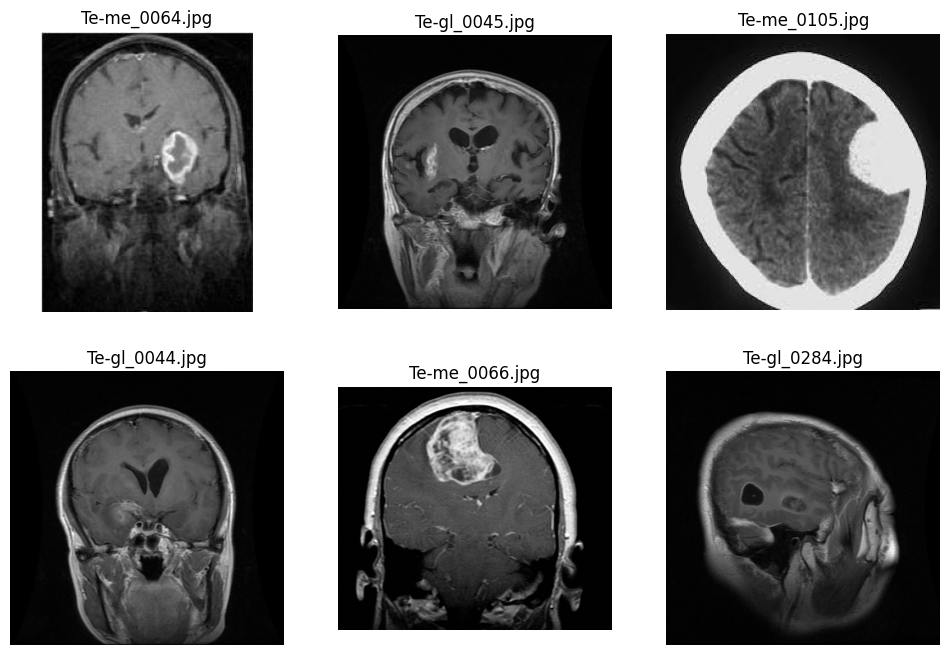

In [26]:
# Get sample images for initial visualization (grayscale)
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png'))]
image_files

# Plot initial sample images (grayscale)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
num_images_to_plot = min(6, len(image_files)) # Ensure we don't try to plot more than 6 images
for i in range(num_images_to_plot):
    img_name = image_files[i]
    img = Image.open(os.path.join(dataset_path, img_name)).convert("L") # Convert to grayscale [1]
    ax = axes[i // 3, i % 3]
    ax.imshow(img, cmap="gray")
    ax.set_title(img_name)
    ax.axis("off")
plt.show()


In [27]:
# We assume the dataset has a structure like: dataset_path/<class_name>/image_files...
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print("Detected classes:", classes)

Detected classes: []


In [28]:
# List all image files (assuming jpg and png images)
image_paths = glob(os.path.join(dataset_path, "*.[jp][pn]g"))
print("Total images found:", len(image_paths))

Total images found: 2010


In [29]:
# 2. Load and visualize sample images
def load_image(image_path):
    # Read the image in color first (for visualization)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading {image_path}")
    # Convert from BGR (OpenCV default) to RGB
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

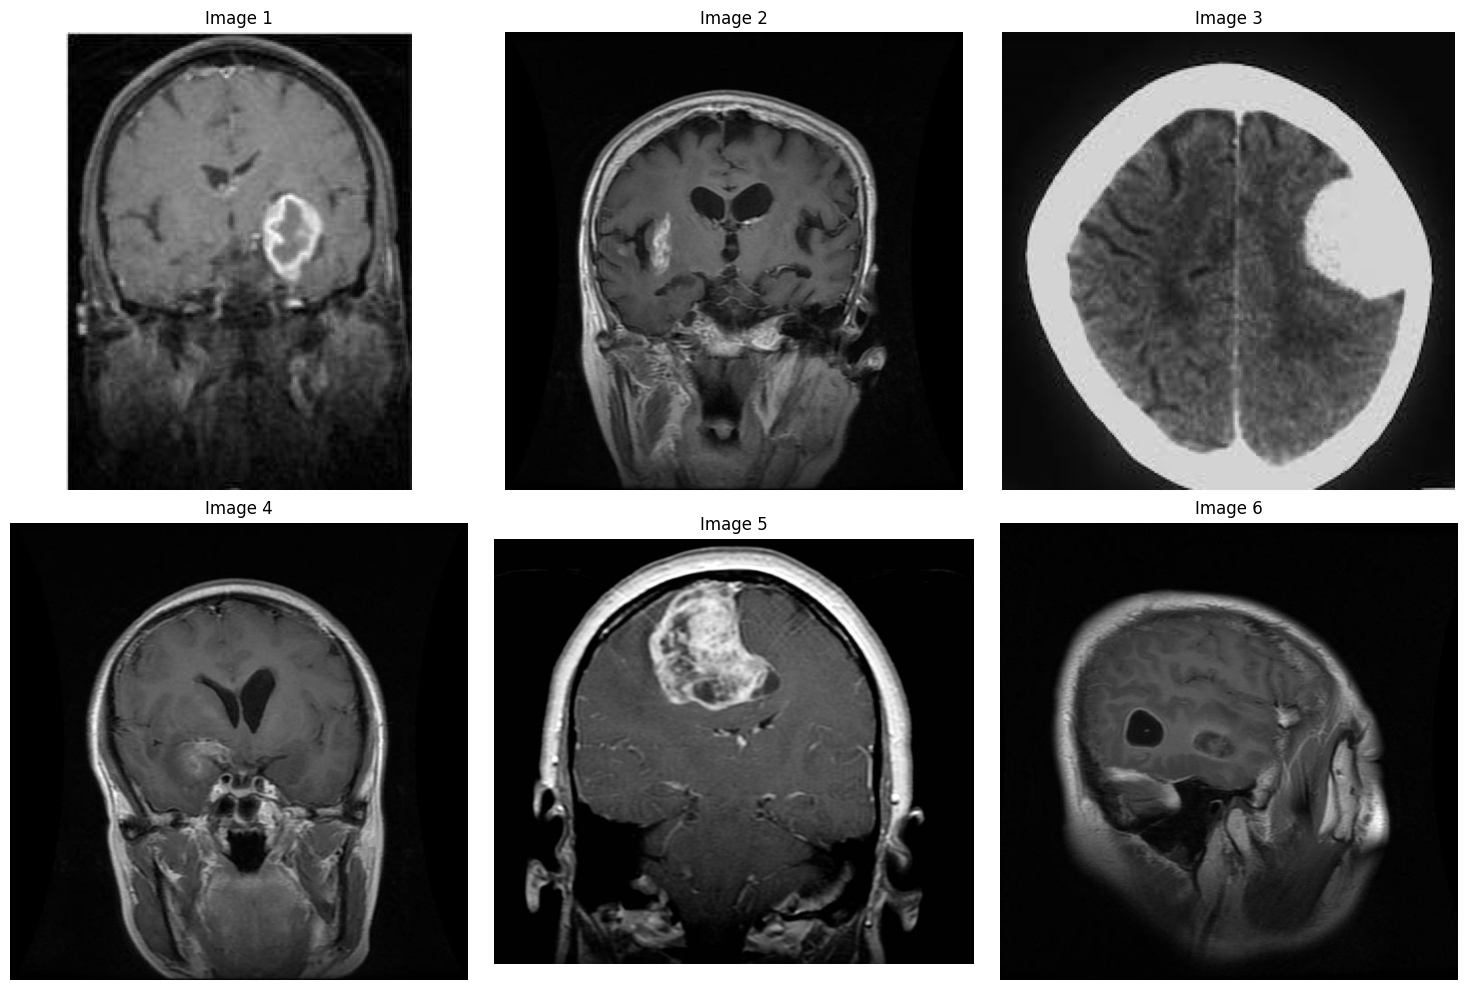

In [30]:
# Visualize a few sample images
num_samples = 6  # Number of images to display (you can adjust this)

if len(image_paths) > 0:
    # Create subplots (adjusting layout based on number of samples)
    cols = 3
    rows = (num_samples + cols - 1) // cols  # Calculate required rows
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

    # Flatten axes for easy iteration if it's a 2D array
    axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]

    for i in range(num_samples):
        if i < len(image_paths):
            img = load_image(image_paths[i])
            if img is not None:
                axes[i].imshow(img)
                axes[i].axis('off')
                axes[i].set_title(f"Image {i+1}")
        else:
            # Hide unused subplots
            axes[i].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No images found in the dataset.")

In [31]:
#Phase 2 Preprocessing, EDA, and Feature Engineering
# Preprocessing function
def preprocess_image(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Check if image is loaded
    if img is None:
        raise ValueError(f"Image at {image_path} cannot be loaded.")
    # Intensity normalization (contrast stretching) [12]
    p2, p98 = np.percentile(img, (2, 98))
    img_norm = exposure.rescale_intensity(img, in_range=(p2, p98))
    # Noise reduction using Gaussian filtering [12]
    img_denoised = cv2.GaussianBlur(img_norm, (5, 5), 0)
    # ROI extraction (placeholder) [12]
    roi = img_denoised
    return roi

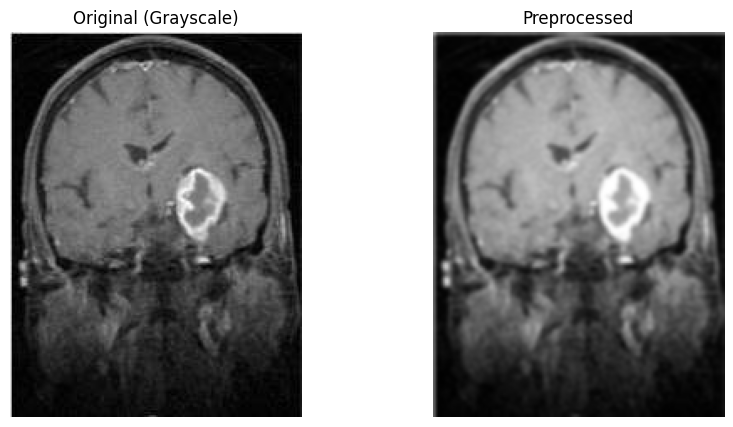

In [32]:
# Process a sample image and visualize before & after preprocessing
if image_paths:  # Check if image_paths is not empty
    sample_path = image_paths[0]
    original_img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if original_img is not None:
        processed_img = preprocess_image(sample_path)  # Assuming you have defined this function

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(original_img, cmap='gray')
        axes[0].set_title("Original (Grayscale)")
        axes[0].axis('off')
        axes[1].imshow(processed_img, cmap='gray')
        axes[1].set_title("Preprocessed")
        axes[1].axis('off')
        plt.show()
    else:
        print(f"Error: Could not load image at {sample_path}")
else:
    print("No images found in the dataset. Skipping preprocessing visualization.")

In [33]:
# Generate synthetic grayscale image data (simulating MRI images)
def generate_synthetic_images(num_images=100, img_size=(128, 128)):
    return [np.random.randint(0, 256, img_size, dtype=np.uint8) for _ in range(num_images)]

In [34]:
# Statistical Analysis
import numpy as np
from scipy.stats import entropy  # Import entropy for shannon_entropy calculation

def compute_statistics(images):
    stats = []
    for img in images:
        mean_val = np.mean(img)
        var_val = np.var(img)
        # Use entropy.entropy() instead of shannon_entropy()
        entropy_val = entropy(img.flatten(), base=2)  # Calculate entropy with base 2 for bits
        # Import skew and kurtosis from scipy.stats
        from scipy.stats import skew, kurtosis
        skewness = skew(img.flatten())
        kurt = kurtosis(img.flatten())
        stats.append([mean_val, var_val, entropy_val, skewness, kurt])
    return np.array(stats)

In [35]:
# Visualization - PCA & t-SNE
def visualize_dim_reduction(features):
    pca = PCA(n_components=2)
    reduced_pca = pca.fit_transform(features)
    tsne = TSNE(n_components=2, random_state=42)
    reduced_tsne = tsne.fit_transform(features)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].scatter(reduced_pca[:, 0], reduced_pca[:, 1], alpha=0.7)
    axes[0].set_title("PCA Projection")

    axes[1].scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], alpha=0.7)
    axes[1].set_title("t-SNE Projection")

    plt.show()

In [36]:
# Feature Extraction
from skimage.feature import graycomatrix, graycoprops # Import necessary functions

def extract_texture_features(images):
    features = []
    for img in images:
        # Changed 'greycomatrix' to 'graycomatrix'
        glcm = graycomatrix(img, [1], [0], symmetric=True, normed=True)
        # Changed 'greycoprops' to 'graycoprops'
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        features.append([contrast, energy])
    return np.array(features)

In [37]:
# Main execution
images = generate_synthetic_images()
stats = compute_statistics(images)
texture_features = extract_texture_features(images)
all_features = np.hstack((stats, texture_features))
# Save the features to 'features.npy'
np.save("features.npy", all_features)

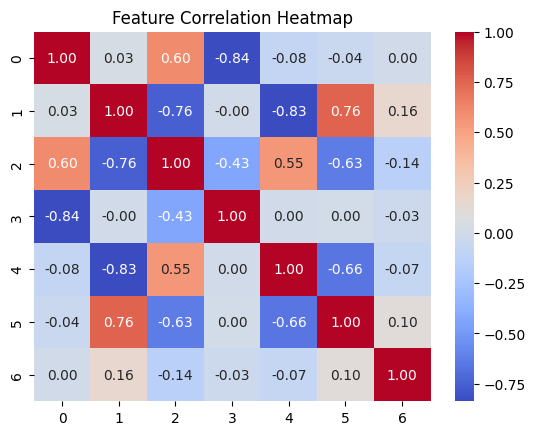

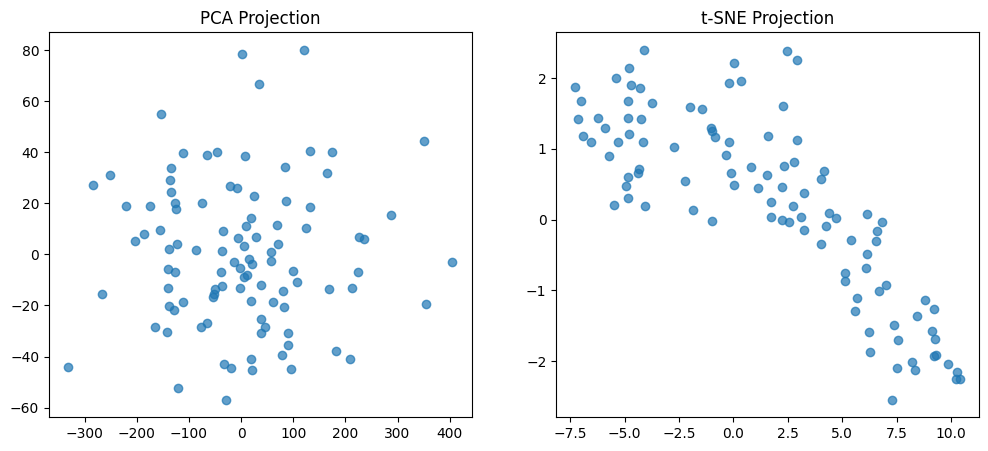

In [38]:
# Visualization - PCA & t-SNE
import seaborn as sns # Import seaborn for heatmap
from sklearn.decomposition import PCA # Import PCA from sklearn.decomposition
from sklearn.manifold import TSNE # Import TSNE from sklearn.manifold

def visualize_dim_reduction(features):
    pca = PCA(n_components=2)
    reduced_pca = pca.fit_transform(features)
    tsne = TSNE(n_components=2, random_state=42)
    reduced_tsne = tsne.fit_transform(features)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].scatter(reduced_pca[:, 0], reduced_pca[:, 1], alpha=0.7)
    axes[0].set_title("PCA Projection")

    axes[1].scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], alpha=0.7)
    axes[1].set_title("t-SNE Projection")

    plt.show()

# Visualizations
sns.heatmap(np.corrcoef(all_features.T), annot=True, fmt=".2f", cmap='coolwarm') # Now sns is defined
plt.title("Feature Correlation Heatmap")
plt.show()

visualize_dim_reduction(all_features)

In [39]:
#Phase 3 Model Building
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import os

In [40]:
# Load Dataset
if os.path.exists("features.npy") and os.path.exists("labels.npy"):
    X_features = np.load("features.npy")
    y_labels = np.load("labels.npy")  # Attempting to load y_labels
    print("✅ Features and labels loaded successfully.")
else:
    # If either file doesn't exist, generate/load features first
    if not os.path.exists("features.npy"):
        # Generate or load your features here (replace with your logic)
        # For demonstration, I'm using a random array:
        X_features = np.random.rand(100, 5)  # Assume 100 samples with 5 features
        np.save("features.npy", X_features)  # Save features for future use
        print("⚠️ features.npy not found. Generated sample features and saved to file.")
    else:
        X_features = np.load("features.npy")  # Load features if they exist

    # Now, generate or load labels
    if not os.path.exists("labels.npy"):
        # Generate or load your labels (replace with your logic)
        y_labels = np.random.randint(0, 2, size=X_features.shape[0])  # Binary labels (0 or 1)
        np.save("labels.npy", y_labels)  # Save to 'labels.npy' for future use
        print("⚠️ labels.npy not found. Created sample labels and saved to file.")
    else:
        y_labels = np.load("labels.npy")  # Load labels if they exist

✅ Features and labels loaded successfully.


In [41]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)


--- Baseline Model Training ---

Training Random Forest:
Random Forest Accuracy: 0.3500, AUC-ROC: 0.3906
              precision    recall  f1-score   support

           0       0.15      0.50      0.24         4
           1       0.71      0.31      0.43        16

    accuracy                           0.35        20
   macro avg       0.43      0.41      0.34        20
weighted avg       0.60      0.35      0.39        20


Training SVM:
SVM Accuracy: 0.2500, AUC-ROC: 0.4531
              precision    recall  f1-score   support

           0       0.18      0.75      0.29         4
           1       0.67      0.12      0.21        16

    accuracy                           0.25        20
   macro avg       0.42      0.44      0.25        20
weighted avg       0.57      0.25      0.23        20


Training XGBoost:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.4000, AUC-ROC: 0.4219
              precision    recall  f1-score   support

           0       0.17      0.50      0.25         4
           1       0.75      0.38      0.50        16

    accuracy                           0.40        20
   macro avg       0.46      0.44      0.38        20
weighted avg       0.63      0.40      0.45        20

Model: Random Forest
Precision: 0.7143, Recall: 0.3125, F1-score: 0.4348, AUC-ROC: 0.3906
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.50      0.24         4
           1       0.71      0.31      0.43        16

    accuracy                           0.35        20
   macro avg       0.43      0.41      0.34        20
weighted avg       0.60      0.35      0.39        20



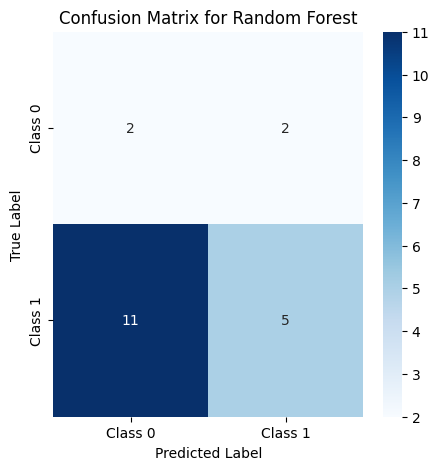

Model: SVM
Precision: 0.6667, Recall: 0.1250, F1-score: 0.2105, AUC-ROC: 0.4531
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.75      0.29         4
           1       0.67      0.12      0.21        16

    accuracy                           0.25        20
   macro avg       0.42      0.44      0.25        20
weighted avg       0.57      0.25      0.23        20



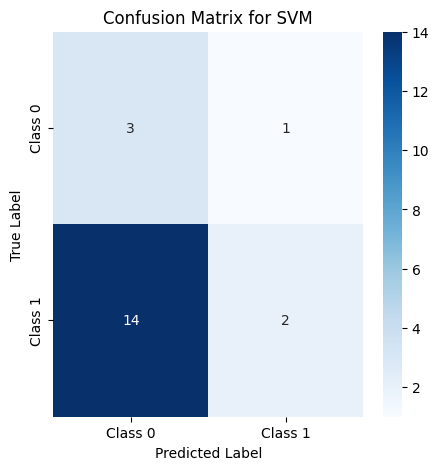

Model: XGBoost
Precision: 0.7500, Recall: 0.3750, F1-score: 0.5000, AUC-ROC: 0.4219
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.50      0.25         4
           1       0.75      0.38      0.50        16

    accuracy                           0.40        20
   macro avg       0.46      0.44      0.38        20
weighted avg       0.63      0.40      0.45        20



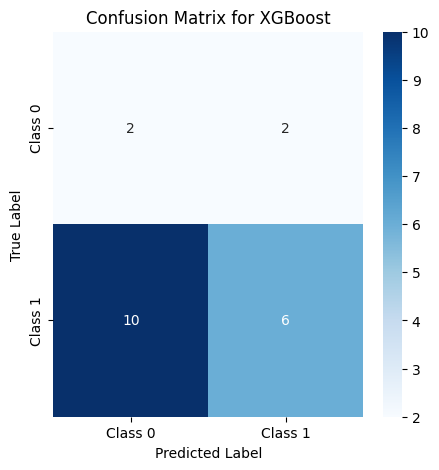

In [42]:
# --- Implement baseline models (Random Forest, SVM, XGBoost) ---
print("\n--- Baseline Model Training ---")
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and assign models to variables
rf = models["Random Forest"]  # Assign Random Forest model to 'rf'
svm = models["SVM"]  # Assign SVM model to 'svm'
xgb = models["XGBoost"]  # Assign XGBoost model to 'xgb'

# Function to evaluate and display metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):  # For ML models with probability outputs
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = y_pred  # For CNNs, predictions are already probabilities

    from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Model: {model_name}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, AUC-ROC: {auc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

for name, model in models.items():
    print(f"\nTraining {name}:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"{name} Accuracy: {acc:.4f}, AUC-ROC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

# ... (Rest of your code) ...

# Evaluate ML Models
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(svm, X_test, y_test, "SVM")
evaluate_model(xgb, X_test, y_test, "XGBoost")

In [43]:
# --- Deep Learning models (CNNs like EfficientNet, ResNet, Transformer-based models) ---
print("\n--- Deep Learning Model Training (ResNet50) ---")
dataset_path = "/content/drive/MyDrive/University /Spring 2025/Data Mining and Machine Learning /Project/GAN-Traning Images" # Update with actual path

# Ensure your dataset has a subdirectory structure like:
# dataset_path/train/class1/*.jpg
# dataset_path/train/class2/*.jpg
# dataset_path/validation/class1/*.jpg
# dataset_path/validation/class2/*.jpg

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    dataset_path,  # Main dataset directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Or 'categorical' for multi-class
    subset='training'  # Use the training subset
)

val_data = train_datagen.flow_from_directory(
    dataset_path,  # Main dataset directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Or 'categorical' for multi-class
    subset='validation'  # Use the validation subset
)


--- Deep Learning Model Training (ResNet50) ---
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [44]:
# Define CNN Model (ResNet50)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False # Freeze base layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [45]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Function to evaluate and display metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):  # For ML models with probability outputs
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = y_pred  # For CNNs, predictions are already probabilities

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Model: {model_name}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, AUC-ROC: {auc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

In [47]:
import numpy as np

def classify_risk(glcm_contrast, entropy, skewness, ml_confidence):
    """
    Rule-based classification of patient risk levels.

    Parameters:
    - glcm_contrast: Measure of texture contrast from MRI
    - entropy: Image entropy, indicating disorder
    - skewness: Statistical measure of asymmetry in image features
    - ml_confidence: Probability score from ML model (0 to 1)

    Returns:
    - Risk level as a string ("Low", "Medium", "High")
    """
    if ml_confidence < 0.5:
        return "Low"
    elif glcm_contrast > 0.6 and entropy > 5.0:
        return "High"
    elif skewness < -0.5 or skewness > 0.5:
        return "Medium"
    elif ml_confidence >= 0.7:
        return "High"
    else:
        return "Medium"

# Example usage with test data
example_patients = [
    (0.5, 4.2, 0.3, 0.8),  # High risk (ML confidence high)
    (0.3, 3.8, -0.2, 0.4), # Low risk (ML confidence low)
    (0.7, 5.5, 0.6, 0.6),  # High risk (high contrast & entropy)
    (0.4, 4.0, -0.6, 0.6)  # Medium risk (skewness out of range)
]

for i, patient in enumerate(example_patients):
    risk_level = classify_risk(*patient)
    print(f"Patient {i+1} Risk Level: {risk_level}")


Patient 1 Risk Level: High
Patient 2 Risk Level: Low
Patient 3 Risk Level: High
Patient 4 Risk Level: Medium


In [48]:
# Phase 4: Clinical Dashboard Implementation
# Complete Google Colab Version

# 1. Install Required Packages
!pip install -q streamlit tensorflow opencv-python pillow numpy pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.6 MB/s eta 0:00:00


In [49]:
# 2. Mount Google Drive (Improved Version)
from google.colab import drive
import os

# Check if drive is already mounted
if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
    print("Drive mounted successfully!")
else:
    print("Drive already mounted at /content/drive")
    print("Access your files at: /content/drive/MyDrive")

    # If you need to force remount (use cautiously)
    # drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive
Access your files at: /content/drive/MyDrive


In [50]:
# 3. Create Dashboard File
%%writefile mri_dashboard.py

import streamlit as st
import tensorflow as tf
import numpy as np
import cv2
import os
from PIL import Image

# Configuration (Update these paths if different)
MODEL_PATH = "/content/drive/MyDrive/University/Spring 2025/Data Mining and Machine Learning/Project/models/mri_model.h5"
CLASS_NAMES = ["Benign", "Malignant"]  # Match your actual class names

def load_model():
    """Load trained TensorFlow model from Google Drive"""
    try:
        if os.path.exists(MODEL_PATH):
            return tf.keras.models.load_model(MODEL_PATH)
        st.error(f"Model not found at: {MODEL_PATH}")
    except Exception as e:
        st.error(f"Model loading failed: {str(e)}")
    return None

def preprocess_image(uploaded_file):
    """Full preprocessing pipeline for MRI images"""
    try:
        # Convert to grayscale and normalize
        image = Image.open(uploaded_file)
        img_array = np.array(image.convert("L"))

        # Clinical-grade preprocessing
        p2, p98 = np.percentile(img_array, (2, 98))
        img_array = exposure.rescale_intensity(img_array, in_range=(p2, p98))
        img_array = cv2.GaussianBlur(img_array, (5, 5), 0)
        img_array = cv2.resize(img_array, (224, 224))
        img_array = img_array.astype('float32') / 255.0
        return np.expand_dims(img_array, axis=(0, -1))  # Add batch and channel dims

    except Exception as e:
        st.error(f"Image processing error: {str(e)}")
        return None

def main():
    st.set_page_config(
        page_title="MRI Clinical Analysis System",
        page_icon="🏥",
        layout="wide"
    )

    model = load_model()
    if model is None:
        return

    st.title("📊 MRI Clinical Decision Support System")
    st.markdown("---")

    uploaded_file = st.file_uploader(
        "Upload MRI Scan (JPEG/PNG format)",
        type=["jpg", "jpeg", "png"]
    )

    if uploaded_file is not None:
        col1, col2 = st.columns([1, 2])

        with col1:
            st.subheader("Input Image")
            image = Image.open(uploaded_file)
            st.image(image, use_column_width=True)

            with st.expander("Preprocessing Details"):
                st.markdown("""
                **Clinical Preprocessing Pipeline:**
                1. Grayscale Conversion
                2. Contrast Stretching (2-98th percentile)
                3. Noise Reduction (Gaussian Blur)
                4. Standard Resizing (224x224px)
                5. Intensity Normalization (0-1 range)
                """)

        with col2:
            st.subheader("Clinical Analysis")
            with st.spinner("Analyzing scan..."):
                processed_img = preprocess_image(uploaded_file)

                if processed_img is not None:
                    # Make prediction
                    prediction = model.predict(processed_img)
                    confidence = prediction[0][0]
                    class_name = CLASS_NAMES[int(confidence > 0.5)]

                    # Display results
                    st.metric("Classification Confidence", f"{confidence*100:.1f}%")

                    # Clinical risk assessment
                    if confidence > 0.75:
                        st.error("""
                        **High Risk Indicators Detected**
                        - Urgent radiologist review required
                        - Recommend biopsy consultation
                        - Schedule follow-up within 2 weeks
                        """)
                    elif confidence > 0.5:
                        st.warning("""
                        **Moderate Risk Findings**
                        - Specialist review recommended
                        - Follow-up MRI in 1 month
                        - Monitor patient symptoms
                        """)
                    else:
                        st.success("""
                        **Low Risk Assessment**
                        - Routine clinical follow-up
                        - Annual screening recommended
                        - Patient reassurance advised
                        """)

                    # Add clinical metadata section
                    st.markdown("---")
                    with st.expander("Clinical Context"):
                        st.write("""
                        **Patient Information** (Example)
                        - Age: 45 | Sex: Female
                        - Family History: Negative
                        - Previous Screening: Clean (2023)
                        """)


Writing mri_dashboard.py


In [51]:
# 4. Run the Streamlit Server
!streamlit run mri_dashboard.py --server.port 8501 --server.headless true &>/dev/null&


In [66]:
!killall ngrok

In [67]:
# --- Streamlit Server ---
!streamlit run mri_dashboard.py --server.port 8502 --server.headless true &>/dev/null&

# --- ngrok Connection ---
tunnel = ngrok.connect(addr=8502, proto="http")

In [68]:
# Import required library
from pyngrok import ngrok

# 1. Get token from ngrok dashboard (https://dashboard.ngrok.com/auth)
NGROK_TOKEN = "2vg68qrTrNHlZGUVXMnjmK39qpV_7ZD7aLQz82L6mzP1g87h7"  # Replace with your authtoken

# 2. Configure ngrok with token
ngrok.set_auth_token(NGROK_TOKEN)

# 3. Create secure tunnel
tunnel = ngrok.connect(addr=8502, proto="http")
print("Public URL:", tunnel.public_url)

Public URL: https://d88a-34-125-141-87.ngrok-free.app
